# Exercicios de Interpolação

### Exercicio 1 ###

Nos dados abaixo está o número de habitantes de manaus entre 1950 e 2000, como em sala de aula

Compute:
    - Com 3 pontos o número de habitantes de Manaus em 1958 e 1988.
    - Com 4 pontos o número de habitantes em 1958 e 1988.
    
Qual foi a diferença entre os dois resultados?

In [1]:
import numpy as np

ano = np.array([1950,1960,1970,1980,1991,2000])
populacao = np.array([139620,173706,311622,633392,1011500,1403796])

In [2]:
def resolvePoli(c,x):
    return np.array(([x**i*c[len(c)-1-i] for i in range(len(c))])).sum(axis=0)

In [3]:
def escolheIntervalo(x,y,xalvo,n):
    d = np.abs(xalvo - x)
    vx = np.copy(x)
    vy = np.copy(y)
    for i in range(len(x)-n):
        m = np.argmax(d)
        vx = np.delete(vx,m)
        vy = np.delete(vy,m)
        d = np.delete(d,m)
    return vx,vy

In [4]:
def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def eliminacaoGaussianaSimples(A0,b):
    M = np.zeros(A0.shape)
    A = np.concatenate((A0,b.reshape(len(b),1)),axis=1)
    for i in range(len(A)-1):
        A[i+1:] -= (A[i+1:,i]/A[i][i]).reshape((len(M[i+1:]),1))*A[i]
    return resolveTS(A[:,:len(b)],A[:,len(b)])

In [5]:
def interpoli(x,y):
    t = len(x)
    A = np.zeros((t,t),dtype='float')
    for i in range(t):
        A[:,i] = x**(t-i-1)
    return eliminacaoGaussianaSimples(A,y)

In [27]:
print("-> Número de habitantes de 1958:")
x, y = escolheIntervalo(ano,populacao,1958,3)
p0 = round(resolvePoli(interpoli(x,y),1958))
print("\tCom 3 pontos:",p0)
x, y = escolheIntervalo(ano,populacao,1958,4)
p = round(resolvePoli(interpoli(x,y),1958))
print("\tCom 4 pontos:",p)
print("\t- Diferença:",p-p0)

print("-> Número de habitantes de 1958:")
x, y = escolheIntervalo(ano,populacao,1988,3)
p0 = round(resolvePoli(interpoli(x,y),1988))
print("\tCom 3 pontos:",p0)
x, y = escolheIntervalo(ano,populacao,1988,4)
p = round(resolvePoli(interpoli(x,y),1988))
print("\tCom 4 pontos:",p)
print("\t- Diferença:",p-p0)

-> Número de habitantes de 1958:
	Com 3 pontos: 158582.0
	Com 4 pontos: 161143.0
	- Diferença: 2561.0
-> Número de habitantes de 1958:
	Com 3 pontos: 897322.0
	Com 4 pontos: 900741.0
	- Diferença: 3419.0


### Exercicio 2

Dada a função $f(x)=10x^{4}+2x+1$, determine a interpolação de dois pontos $P_2(0.15)$ e $P_2(0.25)$ usando para interpolar os pontos f(0,1), f(0,2) e f(0.3).

- Pelo método de interpolação polinomial
- Pelo Polinômio de Lagrange


In [22]:
def f(x):
    return 10*x**4 + 2*x + 1

x = np.array([0.1,0.2,0.3])
y = f(x)

Qual o erro absoluto e relativo de cada método? Quanto tempo cada um leva para calcular os dois pontos?

### Exercicio 3

Dada a função $f(x)=sen(x)+2x+1$, determine $L_2(0,15)$ e $L_3(0,15)$ usando os valores $f(0,1),f(0,2),f(0,3)$ e $f(0,4)$, usando o polinomio de lagrange.

Plote a função no intervalo [0,0.5] e os pontos computados

### Exercício 4 ###

1 - Na célula abaixo, são dados os números de óbitos em hospitais em Manaus. Como pode ser visto, os dados referentes à 2008 e a 2011 estão faltando. Use a interpolação polinomial com 2,3 e 5 pontos para estimar estes pontos.

2 - Plote as curvas dos polinômios gerados (em dois gráficos), de forma similar ao feito no notebook em sala de aula

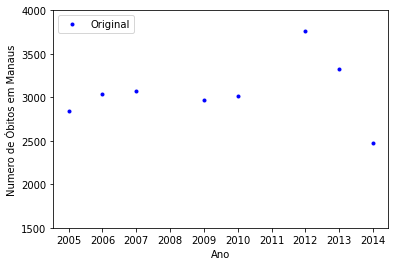

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xmorte = np.array([2005,2006,2007,2009,2010,2012,2013,2014])
ymorte = np.array([2838,3044,3074,2964,3013,3759,3323,2471])

plt.plot(xmorte,ymorte,'b.',label='Original')
plt.ylabel('Numero de Óbitos em Manaus')
plt.xlabel('Ano')
plt.ylim(1500,4000)
plt.xticks([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.legend(loc='upper left')
plt.show()

3 - Agora vamos verificar em quais situações cada método é mais rápido. Apesar de ser mais complexa, assim como a decomposição LU, a interpolação polinomial se torna mais vantajosa quanto mais pontos eu quiser encontrar no intervalo. O mesmo ocorre com o polinômio de Newton, já que as diferenças divididas só devem ser computadas uma vez. Desta forma, para cada um destes métodos, deve haver um número de interpolações usando os mesmos pontos em que eles serão mais rápidos que o Lagrange.

O que você deve fazer: Comparar o tempo de execução de pre-computar os dois métodos apenas uma vez e com eles achar __X__ pontos com rodar o Lagrange __X__ vezes.

Para fazer esta comparação, use as seguintes funções:

In [3]:
def comparaPoli(x,y,xalvo,n):
    c = interpoli(x,y)
    for i in range(n):
        resolvePoli(c,xalvo)

def comparaNewton(x,y,xalvo,n):
    d = difdiv(x,y)
    for i in range(n):
        poliNewton(x,y,d,xalvo)
        
def comparaLag(x,y,xalvo,n):
    for i in range(n):
        lagrange(c,xalvo)

Faça um gráfico com o tempo de execução das três para diferentes valores de N, para mostrar em que ponto o Polinomial e o Newton são mais vantajosos que o Lagrange: